In [644]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/volve-production-data/Volve production data.xlsx


In [645]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [646]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [647]:
!pip install openpyxl

In [648]:

fileurl = "../input/volve-production-data/Volve production data.xlsx"
df_prod = pd.read_excel(fileurl)
xls = pd.ExcelFile(fileurl)
# first_sheet = xls.sheet_names[0]
dfn = pd.DataFrame()
for sheet in xls.sheet_names:
    df0 = pd.read_excel(xls, sheet_name= sheet)
    dfn = dfn.append(df0)
column_names = {
'DATEPRD': 'dates',
'WELL_BORE_CODE': 'well_id',
'NPD_WELL_BORE_CODE': 'well_name_code',
'NPD_WELL_BORE_NAME': 'Well Name',
'NPD_FIELD_CODE': 'field_code',
'NPD_FIELD_NAME': 'field_name',
'NPD_FACILITY_CODE': 'facility_code',
'NPD_FACILITY_NAME': 'facility_name',
'ON_STREAM_HRS': 'on_stream_hours',
'AVG_DOWNHOLE_PRESSURE': 'bhp',
'AVG_DOWNHOLE_TEMPERATURE': 'bht',
'AVG_DP_TUBING': 'dp_tubing',
'AVG_ANNULUS_PRESS': 'casing_pressure',
'AVG_CHOKE_SIZE_P': 'choke_size',
'AVG_CHOKE_UOM': 'choke_units',
'AVG_WHP_P': 'thp',
'AVG_WHT_P': 'tht',
'DP_CHOKE_SIZE': 'choke_size_percentage',
'BORE_OIL_VOL': 'oil_vol',
'BORE_GAS_VOL': 'gas_vol',
'BORE_WAT_VOL': 'water_vol',
'BORE_WI_VOL': 'water_inj',
'FLOW_KIND': 'flow_kind',
'WELL_TYPE': 'well_type'
}
dfn.rename(columns=column_names, inplace=True)
df = dfn# print(df)df[df['bhp'].isnull()]
# print(df)
df['bhp'].dropna(inplace=True)
df['Well Name'].dropna(inplace=True)
df = df[df['well_type']=='OP']
wellnames = df['Well Name'].unique()
print(wellnames)
df = df[df['Well Name']==wellnames[3]]
first_set_to_drop = ['well_id', 'on_stream_hours', 'well_name_code',
'field_code', 'field_name', 'facility_code', 'facility_name',
'choke_size', 'flow_kind','water_inj','well_type','Year', 'Month',"NPDCode",'choke_units','Wellbore name','On Stream','Oil','Gas','Water','GI','WI']
df = df.drop(first_set_to_drop, axis=1)
df['gor'] =df['gas_vol']/df['oil_vol']
df['wc'] = df['water_vol']/(df['water_vol']+df['oil_vol'])# All = ['bhp','bht','dp_tubing', 'tht', 'thp', 'choke_size_percentage', 'oil_vol', 'gor', 'wc','gas_vol', 'water_vol']
All = ['bhp','bht','dp_tubing', 'oil_vol','gas_vol', 'water_vol','wc','index']



['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-5']


In [649]:
print(df)

          dates  Well Name  bhp  bht  dp_tubing  casing_pressure       thp  \
4967 2008-02-12  15/9-F-14  0.0  0.0    0.00000          0.00000   0.00000   
4968 2008-02-13  15/9-F-14  0.0  0.0    0.00000          0.00000   0.00000   
4969 2008-02-14  15/9-F-14  0.0  0.0    0.00000          0.00000   0.00000   
4970 2008-02-15  15/9-F-14  0.0  0.0    0.00000          0.00006   0.00000   
4971 2008-02-16  15/9-F-14  0.0  0.0    0.00000          0.00006   0.00000   
...         ...        ...  ...  ...        ...              ...       ...   
8018 2016-09-13  15/9-F-14  0.0  0.0   10.87335         10.58266  10.87335   
8019 2016-09-14  15/9-F-14  0.0  0.0   10.87699         10.58311  10.87699   
8020 2016-09-15  15/9-F-14  0.0  0.0   10.88277         10.58207  10.88277   
8021 2016-09-16  15/9-F-14  0.0  0.0   10.87889         10.58325  10.87889   
8022 2016-09-17  15/9-F-14  0.0  0.0   10.87613         10.58302  10.87613   

      tht  choke_size_percentage  oil_vol  gas_vol  water_vol  

In [650]:
# plt.plot(df['choke_units'])

In [651]:
# print(wellnames[2])

In [652]:
def clustering(df, a, b):

    from sklearn.preprocessing import MinMaxScaler 
    #from sklearn.cluster import OPTICS
    from sklearn.cluster import DBSCAN
    scaler = MinMaxScaler()
    DaysAndOilRate_trans = df.copy()
    DaysAndOilRate_trans[[a,b]] = scaler.fit_transform(DaysAndOilRate_trans[[a,b]])

    
    
    
    eps = 0.01
    
    outlier_detection1 = DBSCAN(eps = eps,metric="euclidean",n_jobs = -1,min_samples = 4)
    clusters1 = outlier_detection1.fit_predict(DaysAndOilRate_trans[[a,b]])
    df["clusters_oilvsDays"]=clusters1
    DaysAndOilRate_trans["clusters_oilvsDays"]=clusters1
   # Maxim_dens_clusters=df.clusters_oilvsDays.mode()
    anamolous_columns = df["clusters_oilvsDays"]!=-1 # automatize
    df_no_anamolies=df[anamolous_columns].reset_index(drop=True)
#     db_df = pd.DataFrame([outlier_detection1.get_params()])
    return df_no_anamolies

In [653]:
def dataset(
        df
):
    df['date'] = pd.to_datetime(df['dates'])
    start_date = pd.Timestamp(df['dates'].min())  # automatize
    start_date = pd.to_datetime(start_date)
    df['Days'] = (df['date'] - start_date).dt.days
    # print(start_date)

    return df


In [654]:
import math

def find_watercut(
        df
        ):

    df['water_cut'] =(df['Water Rate']/(df['Water Rate']+df['Rate']))*100
    return df


def func1(x ,a,b):
#     return a*np.log(x) + b
    return a*(x) + b


def water_forecast(
        df,
        forecast_date,
        forecast_days,
        well
        ):

    from scipy.optimize import curve_fit

    xx = df[df['dates']<=forecast_date]
    idx = max(xx.index)
    t = np.array(xx['Days'])
    O = np.array(xx['bhp'])
    popt,pcov = curve_fit(func1,t,O,p0=(1,1))
    water_curve_data = popt
    t = np.arange(xx['Days'][idx],xx['Days'][idx]+forecast_days)
    v_for = func1(t,*water_curve_data)
    date_list = [forecast_date + datetime.timedelta(days=x) for x in range(forecast_days)]
    Forecast_water = pd.DataFrame({'Date':date_list,'Days':t,'Forecast':v_for})
    Forecast_water["Well"] = well
    return water_curve_data,Forecast_water
def plot_watercut(
        df,
        forecast_date,
        water_curve_data,
        Forecast_water, well
        ):

    fig = plt.figure(figsize=(9,6))
    # xx1 = df[df['Date'] <= forecast_date]


    xx1 = df[df['dates'] <= forecast_date]
    plt.scatter(xx1['dates'], xx1['bhp'])

    t = np.array(xx1['Days'])
    v_wfit = func1(t, *water_curve_data)
    plt.plot(xx1['dates'], v_wfit)
    plt.plot(Forecast_water['Date'], Forecast_water['Forecast'])
#     plt.yscale('log')
    plt.xlabel('dates', fontsize=14, labelpad=-1)
    plt.ylabel('Water Cut', fontsize=14)
    # plt.xlabel('Date', fontsize=14, labelpad=-1)
    # plt.ylabel('Gas Rate', fontsize=14)
    # plt.title('well name :'df.iloc[0]['Well'])
    plt.title('Water Cut Forecast for Well ' + str(well))
#     plt.savefig("C:/Users/Sys/PycharmProjects/DCA/output/"+'Plot_'+Project +'_'+ well +"_Water Cut Forecast.jpg")

    # 'f model: T=%i' % t
    plt.show()
    return None

In [655]:
from fbprophet import Prophet
import datetime

In [656]:
df['dates']=pd.to_datetime(df['dates'])

In [657]:
print(df)

          dates  Well Name  bhp  bht  dp_tubing  casing_pressure       thp  \
4967 2008-02-12  15/9-F-14  0.0  0.0    0.00000          0.00000   0.00000   
4968 2008-02-13  15/9-F-14  0.0  0.0    0.00000          0.00000   0.00000   
4969 2008-02-14  15/9-F-14  0.0  0.0    0.00000          0.00000   0.00000   
4970 2008-02-15  15/9-F-14  0.0  0.0    0.00000          0.00006   0.00000   
4971 2008-02-16  15/9-F-14  0.0  0.0    0.00000          0.00006   0.00000   
...         ...        ...  ...  ...        ...              ...       ...   
8018 2016-09-13  15/9-F-14  0.0  0.0   10.87335         10.58266  10.87335   
8019 2016-09-14  15/9-F-14  0.0  0.0   10.87699         10.58311  10.87699   
8020 2016-09-15  15/9-F-14  0.0  0.0   10.88277         10.58207  10.88277   
8021 2016-09-16  15/9-F-14  0.0  0.0   10.87889         10.58325  10.87889   
8022 2016-09-17  15/9-F-14  0.0  0.0   10.87613         10.58302  10.87613   

      tht  choke_size_percentage  oil_vol  gas_vol  water_vol  

In [658]:
df= df.reset_index()

In [659]:
# plt.plot(df['date'], df['bhp'])

In [660]:
# plt.plot(df['date'], df['bhp'])

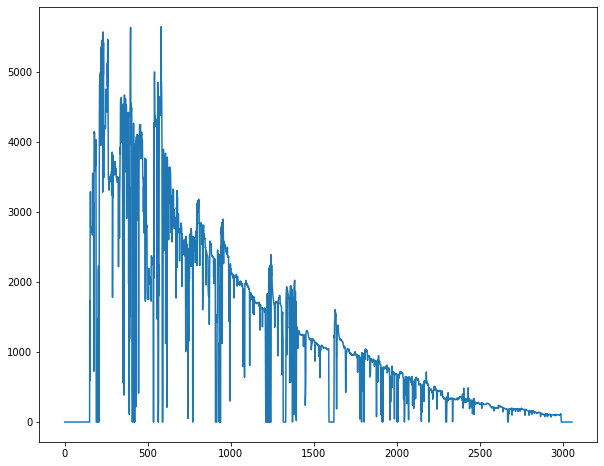

In [661]:
plt.plot(df['oil_vol'])

In [662]:
# plt.figure(figsize=(30,10))

# plt.subplot(1,2,1)

# plt.plot(df['bhp'])

# plt.subplot(1,2,2)
# plt.plot(df['oil_vol'])




In [663]:
# a = stop

In [664]:
wsd = pd.to_datetime('2012-01-01')
sdf = pd.to_datetime('2015-07-01')

edf = pd.to_datetime('2016-09-01')
period = 346

In [665]:
df = df[df['dates']>wsd]

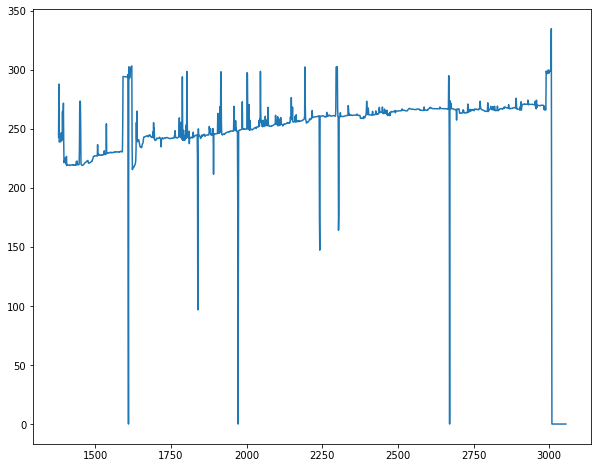

In [666]:
plt.plot(df['bhp'])

In [667]:
# a =stop

In [668]:
corr = df.corr()
# corr[dependent][abs(corr[dependent])>0.5]

print(corr)

                          index       bhp       bht  dp_tubing  \
index                  1.000000 -0.004190 -0.323916   0.105901   
bhp                   -0.004190  1.000000  0.910768   0.971085   
bht                   -0.323916  0.910768  1.000000   0.844690   
dp_tubing              0.105901  0.971085  0.844690   1.000000   
casing_pressure        0.233107  0.209103  0.135547   0.213298   
thp                   -0.363373  0.295476  0.384570   0.062918   
tht                   -0.157706  0.521852  0.698122   0.465372   
choke_size_percentage -0.192701 -0.044398 -0.098114  -0.213622   
oil_vol               -0.848186 -0.103085  0.277527  -0.196651   
gas_vol               -0.846096 -0.105312  0.274286  -0.198451   
water_vol              0.000380  0.399039  0.491090   0.385237   
gor                   -0.005393 -0.060117 -0.003535  -0.058505   
wc                     0.906072  0.742574 -0.286306   0.835243   

                       casing_pressure       thp       tht  \
index        

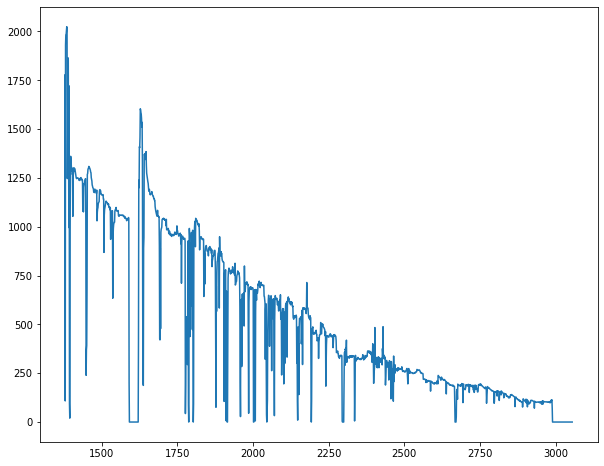

In [669]:
plt.plot(df['oil_vol'])

In [670]:
# a  = stop

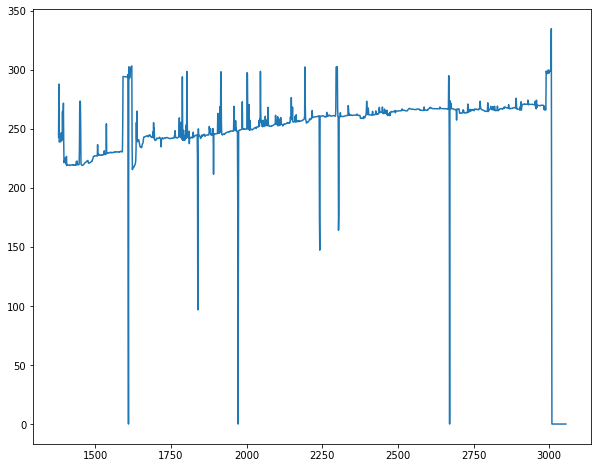

In [671]:
plt.plot(df['bhp'])

In [672]:
# df[]

In [673]:
import seaborn as sns

In [674]:
# sns.pairplot(df)

In [675]:
# plt.plot(df['casing_pressure'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bhp', ylabel='Density'>

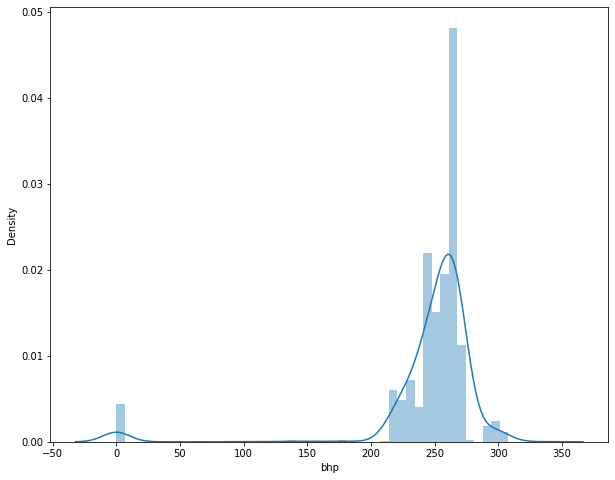

In [676]:
sns.distplot(df['bhp'])

In [677]:
df= df[df["bhp"]>200]
df= df[df["bhp"]<280]

In [678]:
# a =stop

In [679]:
corr = df.corr()
# corr[dependent][abs(corr[dependent])>0.5]

print(corr)

                          index       bhp       bht  dp_tubing  \
index                  1.000000  0.903037 -0.704565   0.945423   
bhp                    0.903037  1.000000 -0.703188   0.971213   
bht                   -0.704565 -0.703188  1.000000  -0.764634   
dp_tubing              0.945423  0.971213 -0.764634   1.000000   
casing_pressure        0.318189  0.420938 -0.452026   0.427848   
thp                   -0.596051 -0.363971  0.575339  -0.575368   
tht                    0.191826  0.106091  0.067088   0.204336   
choke_size_percentage -0.409067 -0.218833  0.418791  -0.427983   
oil_vol               -0.909899 -0.924231  0.719715  -0.923887   
gas_vol               -0.906807 -0.922406  0.717489  -0.921487   
water_vol              0.223862  0.213295 -0.290727   0.312563   
gor                   -0.005552 -0.054391  0.068049  -0.050003   
wc                     0.906123  0.890979 -0.840468   0.939522   

                       casing_pressure       thp       tht  \
index        

In [680]:
# a =stop

In [681]:
df['bhp']=df['bhp'].dropna()

In [682]:
df=df.reset_index()

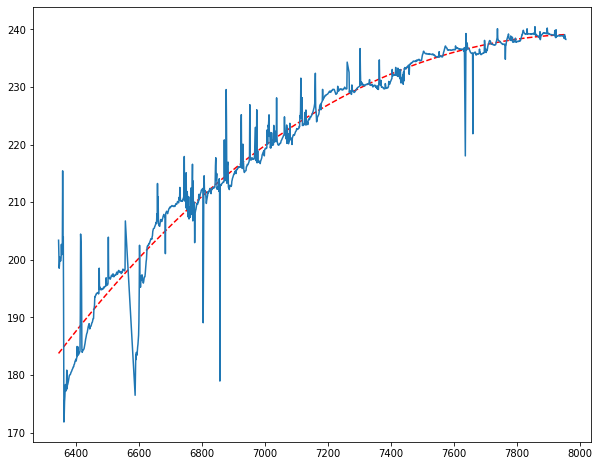

In [683]:

df2 = df
z1 = np.polyfit(df2['index'],df2['dp_tubing'], 3)

p1 = np.poly1d(z1)




plt.plot(df2['index'],p1(df2['index']),"r--")

plt.plot(df2['index'],df2['dp_tubing'] )


In [684]:
df3 = pd.DataFrame()

In [685]:
# a =stop

In [686]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[All]=pd.DataFrame(scaler.fit_transform(df[All], df[All].columns))

In [687]:
# print(df)

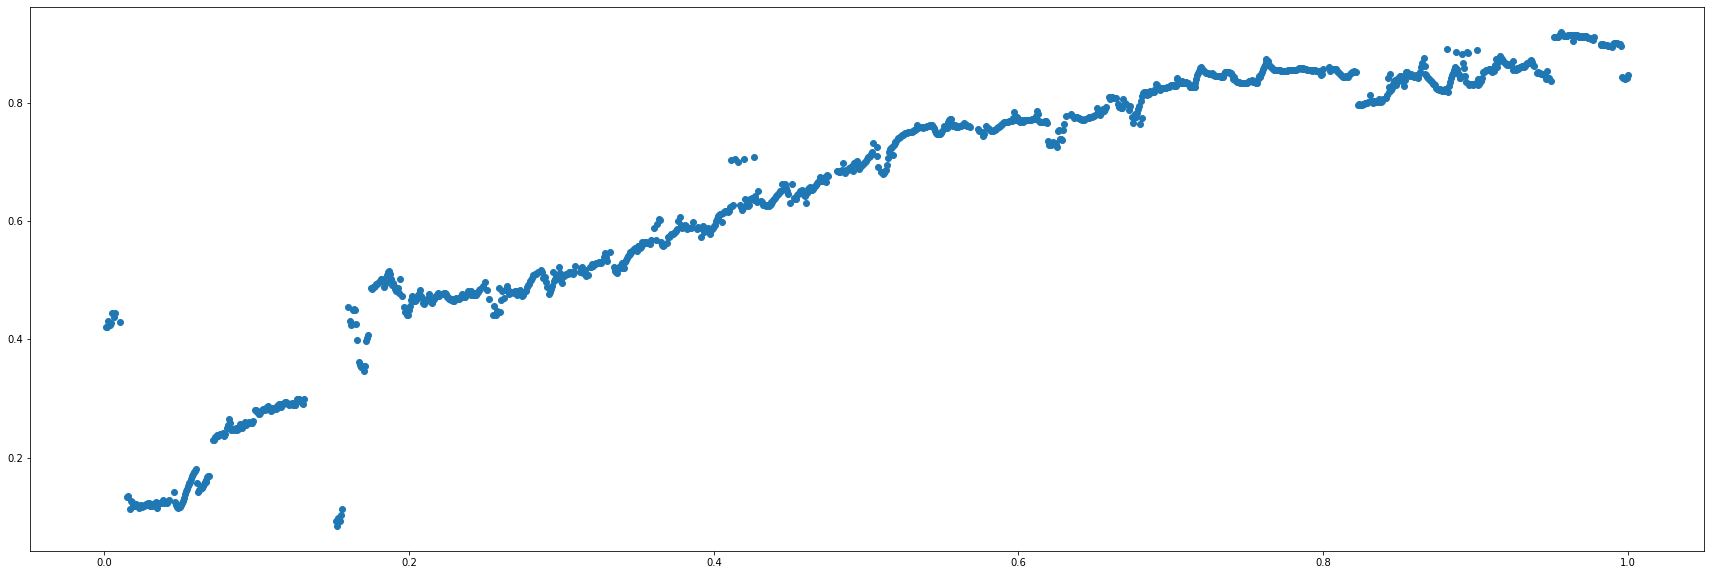

In [688]:
a='index'
b= 'bhp'

df2 = clustering(df,a, b)
plt.figure(figsize=(30,10))

plt.scatter(df2['index'],df2['bhp'])

df = df2

# df2=df

In [689]:
df = dataset(df)

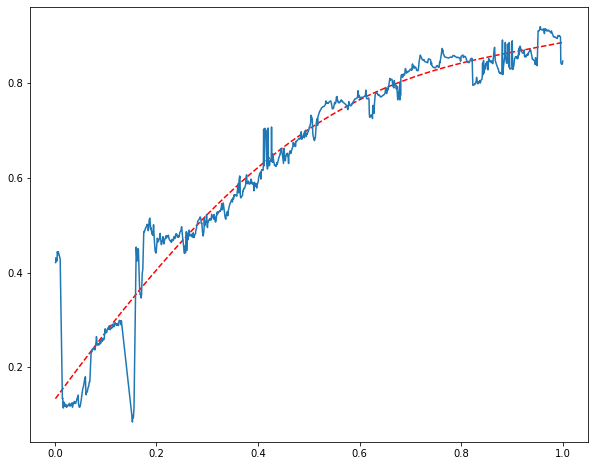

In [690]:
z = np.polyfit(df2['index'],df2['bhp'], 4)

p = np.poly1d(z)




plt.plot(df2['index'],p(df2['index']),"r--")

plt.plot(df2['index'],df2['bhp'] )




In [691]:
df.isna().sum()

level_0                  0
index                    0
dates                    0
Well Name                0
bhp                      0
bht                      0
dp_tubing                0
casing_pressure          0
thp                      0
tht                      0
choke_size_percentage    0
oil_vol                  0
gas_vol                  0
water_vol                0
gor                      0
wc                       0
clusters_oilvsDays       0
date                     0
Days                     0
dtype: int64

In [692]:
corr = df.corr()
# corr[dependent][abs(corr[dependent])>0.5]

print(corr)

                        level_0     index       bhp       bht  dp_tubing  \
level_0                1.000000  1.000000  0.943344 -0.836019   0.955088   
index                  1.000000  1.000000  0.943344 -0.836019   0.955088   
bhp                    0.943344  0.943344  1.000000 -0.934810   0.991545   
bht                   -0.836019 -0.836019 -0.934810  1.000000  -0.945762   
dp_tubing              0.955088  0.955088  0.991545 -0.945762   1.000000   
casing_pressure        0.304288  0.304288  0.455691 -0.552921   0.429938   
thp                   -0.733121 -0.733121 -0.655493  0.722494  -0.747949   
tht                    0.300477  0.300477  0.377354 -0.381624   0.380926   
choke_size_percentage -0.464152 -0.464152 -0.441017  0.583837  -0.538844   
oil_vol               -0.956339 -0.956339 -0.941476  0.871594  -0.955019   
gas_vol               -0.952401 -0.952401 -0.940130  0.870373  -0.952375   
water_vol              0.216712  0.216712  0.401317 -0.552438   0.409859   
gor         

In [693]:
print(df.isna().sum())

level_0                  0
index                    0
dates                    0
Well Name                0
bhp                      0
bht                      0
dp_tubing                0
casing_pressure          0
thp                      0
tht                      0
choke_size_percentage    0
oil_vol                  0
gas_vol                  0
water_vol                0
gor                      0
wc                       0
clusters_oilvsDays       0
date                     0
Days                     0
dtype: int64


In [694]:
df= df.dropna()

In [695]:
print(df.isna().sum())

level_0                  0
index                    0
dates                    0
Well Name                0
bhp                      0
bht                      0
dp_tubing                0
casing_pressure          0
thp                      0
tht                      0
choke_size_percentage    0
oil_vol                  0
gas_vol                  0
water_vol                0
gor                      0
wc                       0
clusters_oilvsDays       0
date                     0
Days                     0
dtype: int64


In [696]:
df1=df[['dates','bhp','bht', 'dp_tubing', 'tht','oil_vol','water_vol', 'gas_vol',
       'choke_size_percentage','wc']]

In [697]:
# x=df[['bht', 'oil_vol', 'choke_size_percentage','index','dp_tubing','wc']]
x=df[['dp_tubing','index','wc']]

y=df["bhp"]

scaler = StandardScaler()
x_transformed = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_transformed, y,test_size=0.2)

regressor_final = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_final.fit(X_train, y_train)
regressor_final.score(X_test,y_test)

0.9934525854621483

In [698]:
df1=df1.set_index('dates')

array([<AxesSubplot:xlabel='dates'>, <AxesSubplot:xlabel='dates'>,
       <AxesSubplot:xlabel='dates'>, <AxesSubplot:xlabel='dates'>,
       <AxesSubplot:xlabel='dates'>, <AxesSubplot:xlabel='dates'>,
       <AxesSubplot:xlabel='dates'>, <AxesSubplot:xlabel='dates'>,
       <AxesSubplot:xlabel='dates'>], dtype=object)

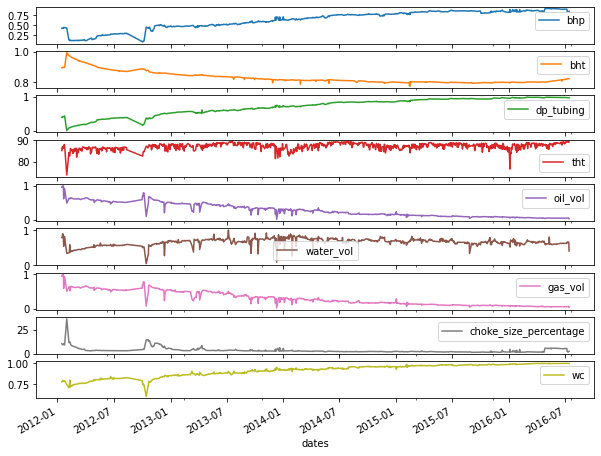

In [699]:
df1.plot(subplots=True)

In [700]:
ny_df_daily=df1.copy()

In [701]:
# !pip install fbprophet

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bhp', ylabel='Density'>

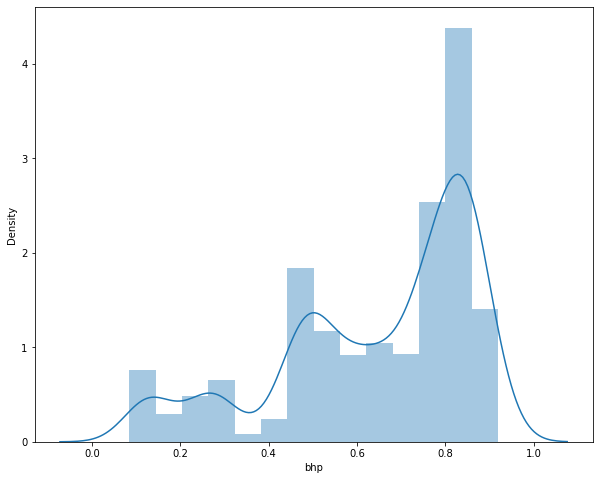

In [702]:
import seaborn as sns
sns.distplot(df['bhp'])

In [703]:
# a = stop

# BHP Prediction

In [704]:
ny_df_daily = ny_df_daily.reset_index()
ny_df_daily['index'] = ny_df_daily.index

Initial log joint probability = -12.2354
          ds
0 2012-01-15
1 2012-01-16
2 2012-01-17
3 2012-01-18
4 2012-01-19
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2652.25    0.00168987       171.936      0.2254      0.2254      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2667.64     0.0237663       347.741           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2681.94    0.00213788        124.72      0.7665      0.7665      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353        2687.3   0.000216278       188.974   6.864e-07       0.001      445  LS failed, Hessian reset 
     399       2691.92      0.006694       66.2657           1           1      500   
    Iter      log prob        ||dx||      ||grad||    

<AxesSubplot:xlabel='ds'>

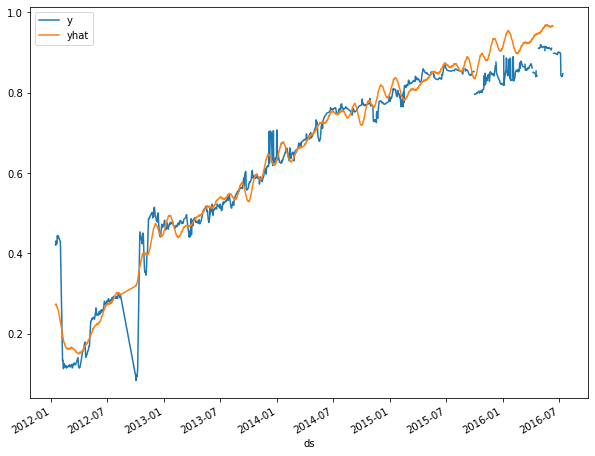

In [705]:
ny_df_bhp=ny_df_daily[['dates','bhp']].rename({'dates':'ds','bhp':'y'}, axis='columns')
ny_df_bhp['cap'] = 1
ny_df_bhp['floor'] = 0
train=ny_df_bhp[(ny_df_bhp['ds'] >= wsd) & (ny_df_bhp['ds'] <= sdf)]
# train=ny_df_bhp[(ny_df_bhp['ds'] >= '2008-05-21') & (ny_df_bhp['ds'] <= '2015-03-31')]
test=ny_df_bhp[(ny_df_bhp['ds'] > sdf)]
m_bhp = Prophet(interval_width=0.1)
m_bhp.fit(train)
future = m_bhp.make_future_dataframe(periods=period)
print(future.head())
future['cap'] = 1
future['floor'] = 0

forecast_bhp = m_bhp.predict(future)
forecast_bhp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
pd.concat([ny_df_bhp.set_index('ds')['y'],forecast_bhp.set_index('ds')['yhat']],axis=1).plot()

In [706]:
import fbprophet

In [707]:
# from fbprophet.diagnostics import cross_validation
# df_cv = cross_validation(ny_df_bhp, horizon = '365 days')

In [708]:

# from fbprophet.diagnostics import performance_metrics
# import itertools
# import numpy as np
# import pandas as pd

# param_grid = {  
#     'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
#     'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
# }

# # Generate all combinations of parameters
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# rmses = []  # Store the RMSEs for each params here

# # Use cross validation to evaluate all parameters
# for params in all_params:
#     m = Prophet(**params).fit(ny_df_bhp)  # Fit model with given params
#     df_cv = cross_validation(m, horizon='30 days', parallel="processes")
#     df_p = performance_metrics(df_cv, rolling_window=1)
#     rmses.append(df_p['rmse'].values[0])

# # Find the best parameters
# tuning_results = pd.DataFrame(all_params)
# tuning_results['rmse'] = rmses
# print(tuning_results)

In [709]:
# a =stop

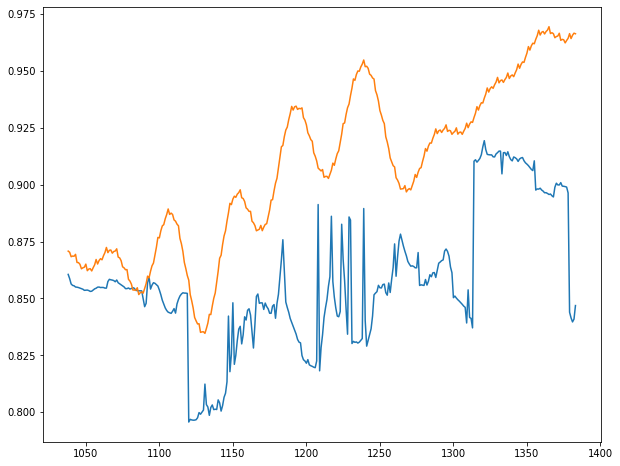

In [710]:
a = sdf

b = edf


dfbhp1 = ny_df_bhp[ny_df_bhp['ds']>a]
dfbhp1 = dfbhp1[dfbhp1['ds']<b]

dfbhp2 = forecast_bhp[forecast_bhp['ds']>a]
dfbhp2 = dfbhp2[dfbhp2['ds']<b]

plt.plot(dfbhp1['y'])
plt.plot(dfbhp2['yhat'])

In [711]:
# r2_score(dfbhp1['y'], dfbhp2['yhat'])

In [712]:
# a  =stop

In [713]:
# plt.plot()

# index forecast

In [714]:
# print(ny_df_daily)

Initial log joint probability = -2.38182
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5299.71    0.00329566       5390.51           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5591.47     0.0278045       29334.2           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5813.88    0.00261955       25602.6      0.4199           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5903.61    0.00804703       15614.2           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6016.04   0.000807838       12928.6           1           1      567   
    Iter      log prob        ||dx||      ||grad||       alpha  

<AxesSubplot:xlabel='ds'>

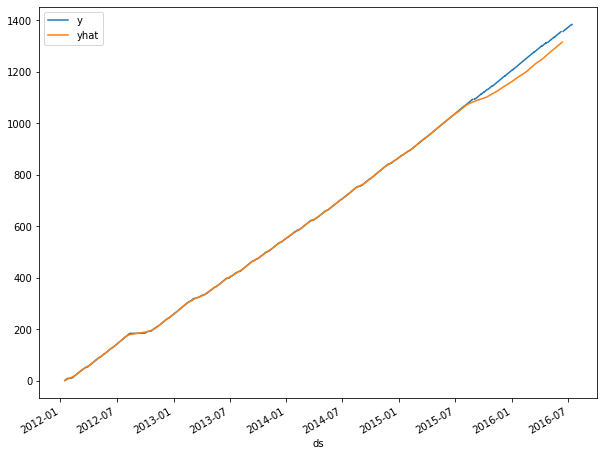

In [715]:
ny_df_index=ny_df_daily[['dates','index']].rename({'dates':'ds','index':'y'}, axis='columns')
train_index=ny_df_index[(ny_df_index['ds'] >= wsd) & (ny_df_index['ds'] <= sdf)]
test_index=ny_df_index[(ny_df_index['ds'] > sdf)]
m_index = Prophet(interval_width=0.1)
m_index.fit(train_index)
future_index = m_index.make_future_dataframe(periods=period)
# future_choke.tail()
forecast_index = m_index.predict(future_index)
forecast_index[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
pd.concat([ny_df_index.set_index('ds')['y'],forecast_index.set_index('ds')['yhat']],axis=1).plot()

# db tubing forecast

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Initial log joint probability = -6.27187
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       2874.41   0.000286538       176.816   3.414e-06       0.001      161  LS failed, Hessian reset 
      99       2874.64    0.00146614       202.212           1           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2881.26    0.00126011       185.964           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286       2883.55   0.000113868       132.495   4.855e-07       0.001      458  LS failed, Hessian reset 
     299       2884.26    0.00594522       514.542           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       2885.16   0.000602906        140.66   7.379e-06       0.001      589  LS failed, Hessian rese

<AxesSubplot:xlabel='ds'>

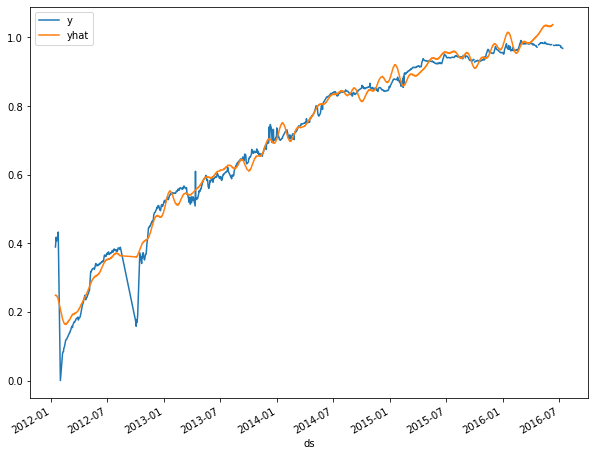

In [716]:
ny_df_dp_tubing=ny_df_daily[['dates','dp_tubing']].rename({'dates':'ds','dp_tubing':'y'}, axis='columns')
train_dp_tubing=ny_df_dp_tubing[(ny_df_dp_tubing['ds'] >= wsd) & (ny_df_dp_tubing['ds'] <= sdf)]

train_dp_tubing['cap'] = 1

test_dp_tubing=ny_df_dp_tubing[(ny_df_dp_tubing['ds'] > sdf)]
m_dp_tubing = Prophet(interval_width=0.1)
m_dp_tubing.fit(train_dp_tubing)
future_dp_tubing = m_dp_tubing.make_future_dataframe(periods=period)
# future_choke.tail()
future_dp_tubing['cap'] = 1

forecast_dp_tubing = m_dp_tubing.predict(future_dp_tubing)
forecast_dp_tubing[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
pd.concat([ny_df_dp_tubing.set_index('ds')['y'],forecast_dp_tubing.set_index('ds')['yhat']],axis=1).plot()

In [717]:
# a = stop

# WC forecast


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Initial log joint probability = -2.2505
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3974.8     0.0964675       9181.03           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4041.2    0.00703225       4527.41      0.4051           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4061.44    0.00208199       1059.37           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4071.13     0.0117803       1670.96           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4080.75    0.00135114        171.37           1           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha   

<AxesSubplot:xlabel='ds'>

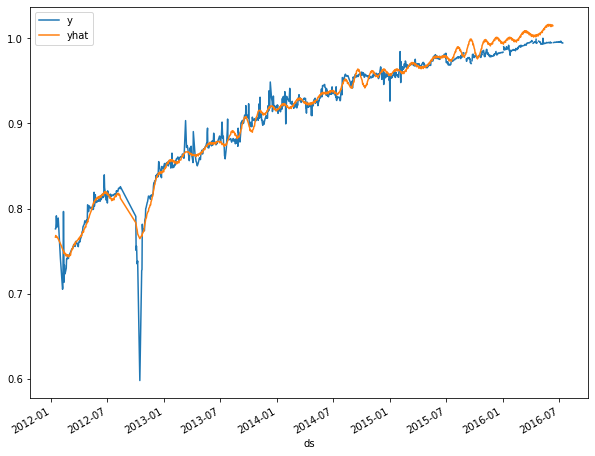

In [718]:
ny_df_wc=ny_df_daily[['dates','wc']].rename({'dates':'ds','wc':'y'}, axis='columns')
train_wc=ny_df_wc[(ny_df_wc['ds'] >= wsd) & (ny_df_wc['ds'] <= sdf)]
train_wc['cap'] = 1

test_wc=ny_df_wc[(ny_df_wc['ds'] > sdf)]
m_wc = Prophet(interval_width=0.1)
m_wc.fit(train_wc)
future_wc = m_wc.make_future_dataframe(periods=period)
# future_choke.tail()
future_wc['cap'] = 1
forecast_wc = m_wc.predict(future_wc)
forecast_wc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
pd.concat([ny_df_wc.set_index('ds')['y'],forecast_wc.set_index('ds')['yhat']],axis=1).plot()

In [719]:
# a = stop

# BHT FORECAST

(1038, 2)
(346, 2)
Initial log joint probability = -2.24604
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4639.83    0.00102707       1405.96           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4719.55    0.00364065       1845.65           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4745.86   0.000116765       1253.85           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4786.02    0.00218463       1108.58           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4829.3    0.00335342       4138.99           1           1      571   
    Iter      log prob        ||dx||      ||g

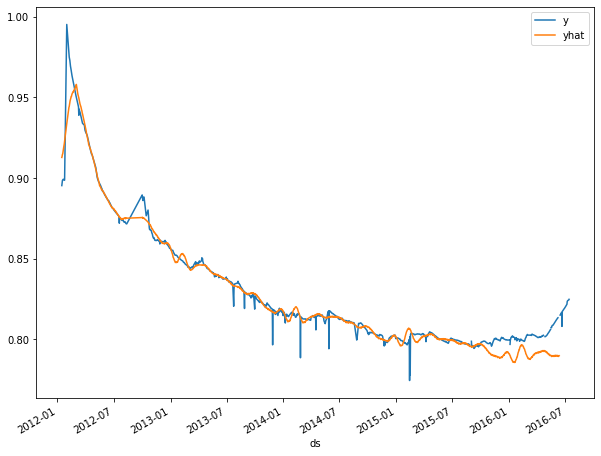

In [720]:
ny_df_bht=ny_df_daily.reset_index()[['dates','bht']].rename({'dates':'ds','bht':'y'}, axis='columns')
train=ny_df_bht[(ny_df_bht['ds'] >= wsd) & (ny_df_bht['ds'] <= sdf)]
test=ny_df_bht[(ny_df_bht['ds'] > sdf)]
print(train.shape)
print(test.shape)
m_bht = Prophet(interval_width=0.1)
m_bht.fit(train)
future = m_bht.make_future_dataframe(periods=period)
future.head()
test.shape
future.shape
forecast = m_bht.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
pd.concat([ny_df_bht.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()
print(ny_df_daily)

# OIL VOL FORECAST

In [721]:
ny_df_daily = df

Initial log joint probability = -20.1808
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2650.06    0.00734244       146.452       1.433      0.1433      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2670.48   0.000242825       95.4815      0.7677      0.7677      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2673.76    0.00155752       119.545      0.9227      0.9227      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2677.09   0.000784988       173.222      0.2742      0.8114      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     421       2678.13     0.0011264       267.065   1.009e-05       0.001      550  LS failed, Hessian reset 
     499       2679.16   2.08759e-05    

<AxesSubplot:xlabel='ds'>

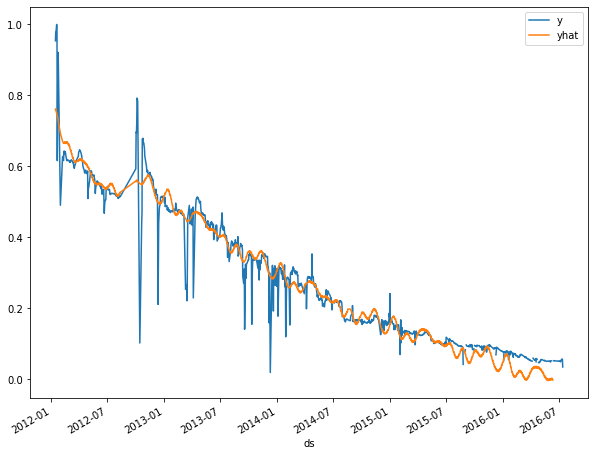

In [722]:

ny_df_oil=ny_df_daily[['dates','oil_vol']].rename({'dates':'ds','oil_vol':'y'}, axis='columns')
ny_df_oil
ny_df_oil['cap'] = 1
ny_df_oil['floor'] = 0
train_oil=ny_df_oil[(ny_df_oil['ds'] >= wsd) & (ny_df_oil['ds'] <= sdf)]
test_oil=ny_df_oil[(ny_df_oil['ds'] > sdf)]
m_oil = Prophet(growth = 'linear')
m_oil.fit(train_oil)
future_oil = m_oil.make_future_dataframe(periods=period)
future_oil['cap'] = 1
future_oil['floor'] = 0
future_oil.tail()
forecast_oil = m_oil.predict(future_oil)
forecast_oil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
pd.concat([ny_df_oil.set_index('ds')['y'],forecast_oil.set_index('ds')['yhat']],axis=1).plot()

In [723]:
# a = stop

# CHOKE SIZE FORECASTING

Initial log joint probability = -6.60071
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2783.49    0.00365475       120.758           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2818.82    0.00175623       183.946           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2846.36    0.00478103       112.822           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2854.76   0.000737175       73.6233           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       2860.58    0.00021174       247.945   3.635e-07       0.001      544  LS failed, Hessian reset 
     499       2864.79   0.000953006    

<AxesSubplot:xlabel='ds'>

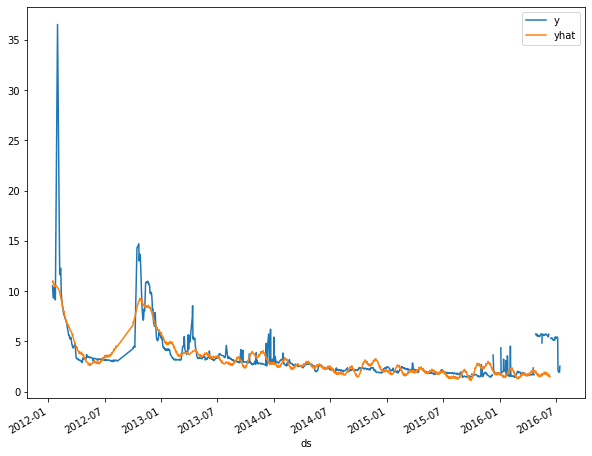

In [724]:
ny_df_choke=ny_df_daily[['dates','choke_size_percentage']].rename({'dates':'ds','choke_size_percentage':'y'}, axis='columns')
train_choke=ny_df_choke[(ny_df_choke['ds'] >= wsd) & (ny_df_choke['ds'] <= sdf)]
test_choke=ny_df_choke[(ny_df_choke['ds'] > sdf)]
m_choke = Prophet(interval_width=0.1)
m_choke.fit(train_choke)
future_choke = m_choke.make_future_dataframe(periods=period)
future_choke.tail()
forecast_choke = m_choke.predict(future_choke)
forecast_choke[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
pd.concat([ny_df_choke.set_index('ds')['y'],forecast_choke.set_index('ds')['yhat']],axis=1).plot()

# MULTIVARIATE BHP FORECASTING

In [725]:
df1=df[['dates','bhp','bht','oil_vol',
       'choke_size_percentage','wc', 'dp_tubing', 'index']]
df1=df1.set_index('dates')
ny_df_daily=df1.copy()
ny_df_final=ny_df_daily.reset_index()[['dates','bhp','bht','oil_vol',
       'choke_size_percentage','wc', 'dp_tubing', 'index']].rename({'dates':'ds','bhp':'y'}, axis='columns')
train_bhp=ny_df_final[(ny_df_final['ds'] >= wsd) & (ny_df_final['ds'] <= sdf)]
test_bhp=ny_df_final[(ny_df_final['ds'] > sdf)]
model_bhp=Prophet(interval_width=0.1)
model_bhp.add_regressor('bht',standardize=False)
model_bhp.add_regressor('oil_vol',standardize=False)

model_bhp.add_regressor('choke_size_percentage',standardize=False)
model_bhp.add_regressor('wc',standardize=False)
model_bhp.add_regressor('dp_tubing',standardize=False)

model_bhp.add_regressor('index',standardize=False)


model_bhp.fit(train_bhp)
model_bhp.params
future_bhp = model_bhp.make_future_dataframe(periods=period)
future_bhp
# # forecast = m_bht.predict(future)
# forecast = model_bhp.predict(future_bhp)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


Initial log joint probability = -12.2354


,ds
0,2012-01-15
1,2012-01-16
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
1379,2016-06-07
1380,2016-06-08
1381,2016-06-09
1382,2016-06-10


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3934.85     0.0176806       30163.5           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4328.01    0.00623733       8775.33           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4417.87   0.000599961       6477.48           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4442.74   9.76988e-05        4835.9      0.5489      0.5489      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4462.31   9.13139e-05       1118.52           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [726]:
future_bhp['cap'] = 1
future_bhp['floor'] = 0


predicted_bht=m_bht.predict(future_bhp)
predicted_bht=predicted_bht[['yhat']]
predicted_bht

predicted_oil=m_oil.predict(future_bhp)
predicted_oil=predicted_oil[['yhat']]
predicted_oil

predicted_choke=m_choke.predict(future_bhp)
predicted_choke=predicted_choke[['yhat']]
predicted_choke

# predicted_bhp=m_bhp.predict(future_bhp)
# predicted_bhp=predicted_bhp[['yhat']]
# predicted_bhp


predicted_index=m_index.predict(future_bhp)
predicted_index=predicted_index[['yhat']]
# predicted_choke
predicted_dp_tubing=m_dp_tubing.predict(future_bhp)
predicted_dp_tubing=predicted_dp_tubing[['yhat']]

predicted_wc=m_wc.predict(future_bhp)
predicted_wc=predicted_wc[['yhat']]

 alpha      alpha0  # evals  Notes 
    2712       4489.63   6.06593e-07       95.4423    3.89e-09       0.001     3241  LS failed, Hessian reset 
    2726       4489.63   7.33955e-07       124.509   5.284e-09       0.001     3302  LS failed, Hessian reset 
    2799       4489.67   2.73284e-06       127.588      0.2636           1     3393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2899        4489.7   6.25052e-06       149.968           1           1     3511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2999       4489.93   0.000775436       1745.45      0.3543           1     3632   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3099       4490.47    0.00027922       223.742       1.526      0.1526     3747   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    3199       4490.85   0

In [727]:
print(len(predicted_index['yhat']))

1384


In [728]:
print(len(df['index']))

1384


In [729]:
print(len(predicted_dp_tubing['yhat']))

print(len(df2))

1384
1384


In [730]:
print(predicted_dp_tubing)

          yhat
0     0.248320
1     0.249469
2     0.247798
3     0.247239
4     0.247260
...        ...
1379  1.033491
1380  1.034184
1381  1.035990
1382  1.037658
1383  1.036970

[1384 rows x 1 columns]


In [731]:
predicted_dp_tubing['yhat'] = (predicted_dp_tubing['yhat']+p1(df2['index']))/2

In [732]:
1578-1384

194

In [733]:
# a = stop

In [734]:
df_final=pd.DataFrame()
df_final['ds']=future_bhp['ds']
df_final['bht']=predicted_bht['yhat']
# df_final['bhp']=predicted_bhp['bhp']

df_final['oil_vol']=predicted_oil['yhat']
df_final['choke_size_percentage']=predicted_choke['yhat']
# df_final['index']=df['index']
df_final['index']=predicted_index['yhat']
df_final['dp_tubing']=predicted_dp_tubing['yhat']
df_final['wc']=predicted_wc['yhat']

In [735]:
# x_to_predict.isna().sum()

In [736]:
# x_to_predict.isna().sum()

In [737]:
# x_to_predict=df_final[['bht', 'oil_vol','choke_size_percentage','index','dp_tubing','wc']]
x_to_predict=df_final[['dp_tubing','index','wc']]

scaler = StandardScaler()
x_to_predict_transformed = scaler.fit_transform(x_to_predict)

final_bhp_regressor_predicted=regressor_final.predict(x_to_predict_transformed)
df_final["bhp_regressor_predicted"]=final_bhp_regressor_predicted
final_bhp_forecast=model_bhp.predict(df_final)
final_forecast=final_bhp_forecast[['ds','yhat']]

In [738]:
df_final_2=df_final
df_final_2=df_final_2.rename(columns={"ds": "dates"})
df_final_2
final_forecast_2=final_forecast
final_forecast_2=final_forecast_2.rename(columns={"ds": "dates"})
final_forecast_2

,dates,yhat
0,2012-01-15,-920.287093
1,2012-01-16,-920.426568
2,2012-01-17,-920.566028
3,2012-01-18,-920.724656
4,2012-01-19,-920.866313
...,...,...
1379,2016-06-07,-1235.426731
1380,2016-06-08,-1235.685878
1381,2016-06-09,-1235.929323
1382,2016-06-10,-1236.173415


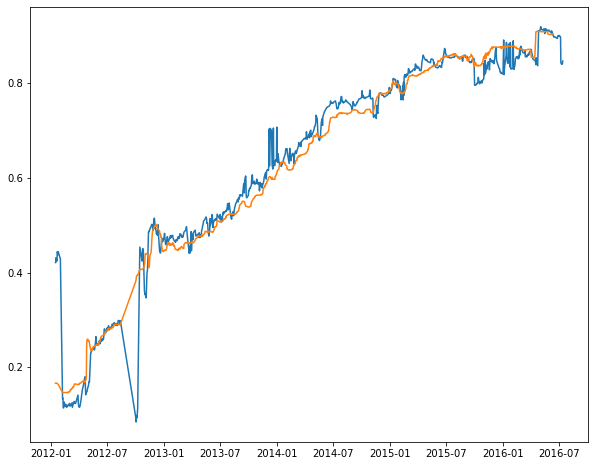

In [739]:
plt.plot(df['dates'],df['bhp'])
plt.plot(df_final_2['dates'],df_final_2['bhp_regressor_predicted'])
# plt.plot(final_forecast_2['dates'],final_forecast_2['yhat'])

In [740]:
# # plt.plot(df_final_2['dates'],df_final_2['bhp_regressor_predicted'])
# plt.plot(df['dates'],df['bhp'])
# plt.plot(final_forecast_2['dates'],final_forecast_2['yhat'])

In [741]:
dfnew2 = final_forecast_2[final_forecast_2['dates']>a]
dfnew2 = dfnew2[dfnew2['dates']<b]

dfnew1 = df[df['dates']>a]
dfnew1 = dfnew1[dfnew1['dates']<b]

dfnew3 = df_final_2[df_final_2['dates']>a]
dfnew3 = dfnew3[dfnew3['dates']<b]

In [742]:
dfnew4 = pd.DataFrame()

dfnew4['dates'] = dfnew3['dates']

dfnew4['pred'] = (dfnew3['bhp_regressor_predicted'] +dfnew2['yhat'])/2

In [743]:
dfnew5 = pd.DataFrame()

dfbhp2.set_index('ds')['yhat']

dfnew5['dates'] = dfnew2['dates']

dfnew5['pred'] = (dfbhp2['yhat'] +dfnew2['yhat'])/2

In [744]:
# dfnew1 = dfnew1.reset_index()
dfnew1['index'] = dfnew1.index

In [745]:
dfnew2 = dfnew2.reset_index()

In [746]:
dfnew2['index'] = dfnew2.index

In [747]:
print(dfnew2)

     index      dates         yhat
0        0 2015-07-02 -1169.681716
1        1 2015-07-03 -1169.882003
2        2 2015-07-04 -1170.066264
3        3 2015-07-05 -1170.271098
4        4 2015-07-06 -1170.459742
..     ...        ...          ...
341    341 2016-06-07 -1235.426731
342    342 2016-06-08 -1235.685878
343    343 2016-06-09 -1235.929323
344    344 2016-06-10 -1236.173415
345    345 2016-06-11 -1236.400366

[346 rows x 3 columns]


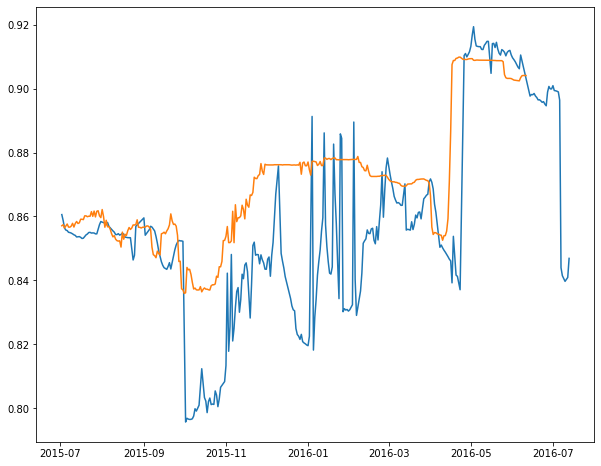

In [748]:
plt.plot(dfnew1['dates'],dfnew1['bhp'])
# plt.plot(dfnew2['dates'],dfnew2['yhat'])

# plt.plot(dfnew5['dates'],dfnew5['pred'])
plt.plot(dfnew3['dates'],dfnew3['bhp_regressor_predicted'])
# plt.plot(dfnew4['dates'],dfnew4['pred'])

In [749]:
print(len(dfnew1))

346


In [750]:
final1 = dfnew3[dfnew3.dates.isin(dfnew1.dates)]

In [751]:
final2 = dfnew1[dfnew1.dates.isin(dfnew3.dates)]

In [752]:
print(len(final1))
print(len(final2))

318
318


In [753]:
print(final1)

          dates       bht   oil_vol  choke_size_percentage        index  \
1038 2015-07-02  0.799501  0.096758               1.924851  1036.874074   
1039 2015-07-03  0.799507  0.093222               1.970130  1037.702761   
1040 2015-07-04  0.799641  0.094215               1.927485  1038.463144   
1041 2015-07-05  0.799353  0.094609               1.872248  1039.312910   
1042 2015-07-06  0.799211  0.099953               1.804485  1040.094429   
...         ...       ...       ...                    ...          ...   
1375 2016-06-03  0.789965 -0.002705               1.727972  1306.157468   
1376 2016-06-04  0.790142 -0.002196               1.681036  1307.125004   
1377 2016-06-05  0.789901 -0.002398               1.626055  1308.179901   
1378 2016-06-06  0.789810  0.002247               1.563429  1309.162109   
1379 2016-06-07  0.790039 -0.001404               1.730312  1310.160878   

       dp_tubing        wc  bhp_regressor_predicted  
1038 -918.053887  0.978375                 0.

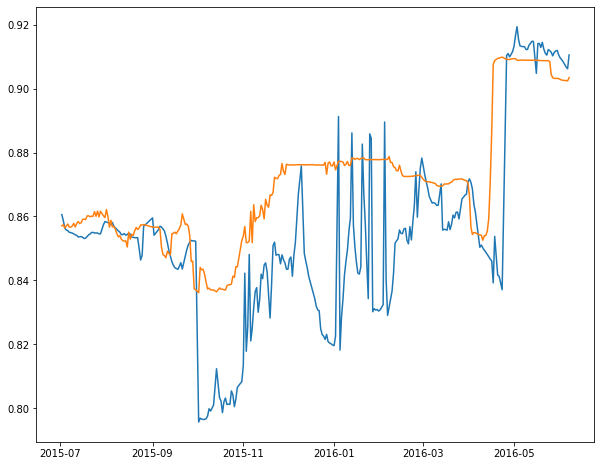

In [754]:
plt.plot(final2['dates'],final2['bhp'])

plt.plot(final1['dates'],final1['bhp_regressor_predicted'])

In [755]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, explained_variance_score, mean_absolute_error
r2_score(final2['bhp'], final1['bhp_regressor_predicted'])

0.2389575888952412

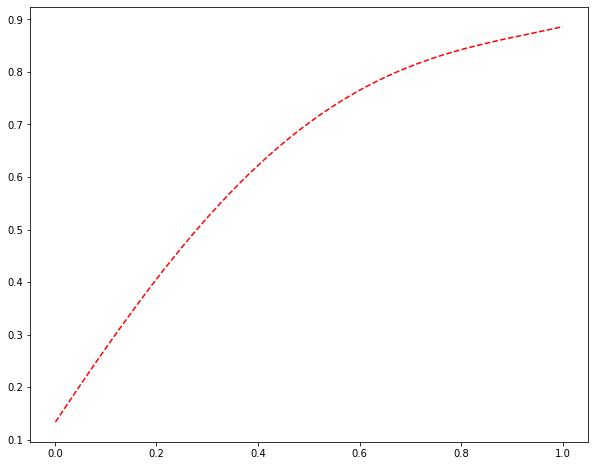

In [756]:

plt.plot(df2['index'],p(df2['index']),"r--")

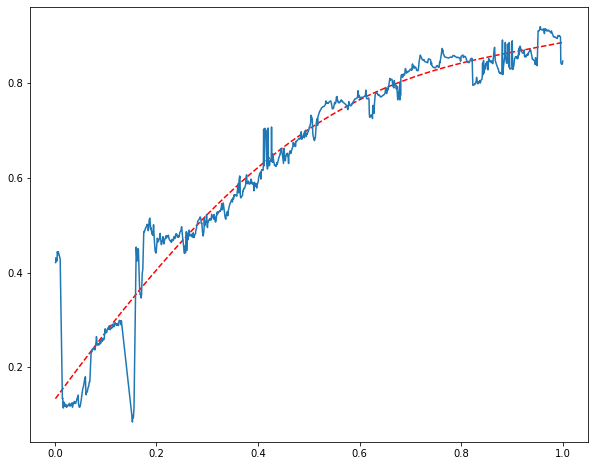

In [757]:

plt.plot(df2['index'],p(df2['index']),"r--")

plt.plot(df2['index'],df2['bhp'] )

In [758]:
red = pd.DataFrame()

In [759]:
red['bhp'] = p(df2['index'])
red['dates'] = df2['dates']

In [760]:
final4 = red[red.dates.isin(final2.dates)]

In [761]:
print(final1)

          dates       bht   oil_vol  choke_size_percentage        index  \
1038 2015-07-02  0.799501  0.096758               1.924851  1036.874074   
1039 2015-07-03  0.799507  0.093222               1.970130  1037.702761   
1040 2015-07-04  0.799641  0.094215               1.927485  1038.463144   
1041 2015-07-05  0.799353  0.094609               1.872248  1039.312910   
1042 2015-07-06  0.799211  0.099953               1.804485  1040.094429   
...         ...       ...       ...                    ...          ...   
1375 2016-06-03  0.789965 -0.002705               1.727972  1306.157468   
1376 2016-06-04  0.790142 -0.002196               1.681036  1307.125004   
1377 2016-06-05  0.789901 -0.002398               1.626055  1308.179901   
1378 2016-06-06  0.789810  0.002247               1.563429  1309.162109   
1379 2016-06-07  0.790039 -0.001404               1.730312  1310.160878   

       dp_tubing        wc  bhp_regressor_predicted  
1038 -918.053887  0.978375                 0.

In [762]:
# final1 = final1.reset_index()
# final2 = final2.reset_index()
final4 = final4.reset_index()

In [763]:
print(final2)

      level_0  index      dates  Well Name       bhp       bht  dp_tubing  \
1038     2612   1038 2015-07-02  15/9-F-14  0.860589  0.800413   0.945578   
1039     2613   1039 2015-07-03  15/9-F-14  0.858729  0.800216   0.941988   
1040     2614   1040 2015-07-04  15/9-F-14  0.856383  0.800061   0.940929   
1041     2615   1041 2015-07-05  15/9-F-14  0.855748  0.799936   0.941118   
1042     2616   1042 2015-07-06  15/9-F-14  0.855581  0.799936   0.940343   
...       ...    ...        ...        ...       ...       ...        ...   
1351     2949   1351 2016-06-03  15/9-F-14  0.908416  0.812427   0.978541   
1352     2950   1352 2016-06-04  15/9-F-14  0.907595  0.812694   0.978589   
1353     2951   1353 2016-06-05  15/9-F-14  0.906749  0.812962   0.978303   
1354     2952   1354 2016-06-06  15/9-F-14  0.906228  0.813296   0.978393   
1355     2953   1355 2016-06-07  15/9-F-14  0.910521  0.813433   0.978783   

      casing_pressure        thp        tht  choke_size_percentage   oil_vo

In [764]:
print(final1)

          dates       bht   oil_vol  choke_size_percentage        index  \
1038 2015-07-02  0.799501  0.096758               1.924851  1036.874074   
1039 2015-07-03  0.799507  0.093222               1.970130  1037.702761   
1040 2015-07-04  0.799641  0.094215               1.927485  1038.463144   
1041 2015-07-05  0.799353  0.094609               1.872248  1039.312910   
1042 2015-07-06  0.799211  0.099953               1.804485  1040.094429   
...         ...       ...       ...                    ...          ...   
1375 2016-06-03  0.789965 -0.002705               1.727972  1306.157468   
1376 2016-06-04  0.790142 -0.002196               1.681036  1307.125004   
1377 2016-06-05  0.789901 -0.002398               1.626055  1308.179901   
1378 2016-06-06  0.789810  0.002247               1.563429  1309.162109   
1379 2016-06-07  0.790039 -0.001404               1.730312  1310.160878   

       dp_tubing        wc  bhp_regressor_predicted  
1038 -918.053887  0.978375                 0.

In [765]:
mean1 = final1['bhp_regressor_predicted'].mean()


# print(mean1)

In [766]:
mean2 = final4['bhp'].mean()

In [767]:
# print(mean2)

In [768]:
dif_mean= (mean2-mean1)

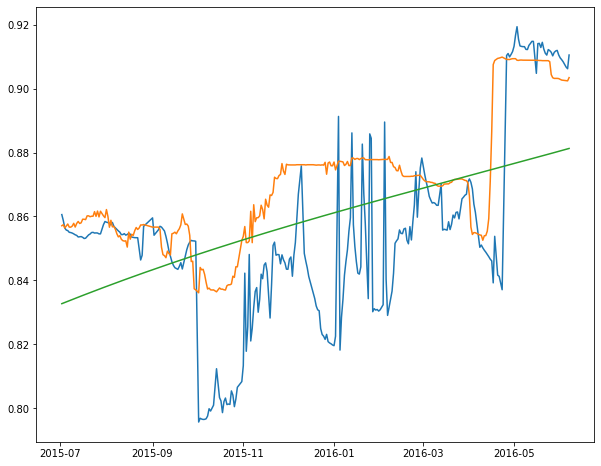

In [769]:
plt.plot(final2['dates'],final2['bhp'])

plt.plot(final1['dates'],final1['bhp_regressor_predicted'])
plt.plot(final4['dates'],final4['bhp'])

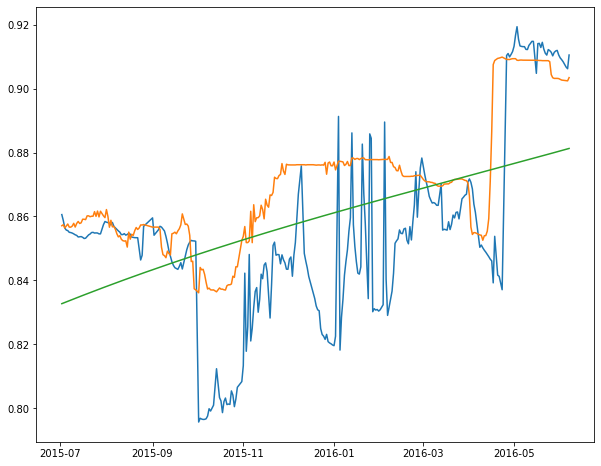

In [770]:
final5 = pd.DataFrame()

# dfbhp2.set_index('ds')['yhat']

final5['dates'] = final1['dates']

final5['bhp'] = (final4['bhp'] +final1['bhp_regressor_predicted'])/2




plt.plot(final2['dates'],final2['bhp'])

plt.plot(final1['dates'],final1['bhp_regressor_predicted'])
plt.plot(final4['dates'],final4['bhp'])
# plt.plot(final5['dates'],final5['bhp'])

# r2_score(final2['bhp'], final5['bhp'])

In [771]:
final1 = final1.reset_index()

In [772]:
final8 = pd.DataFrame()


final8['dates'] = final1['dates']

# final8 = final8.reset_index()
# final8['bhp'] = (final1['bhp_regressor_predicted']+(final4['bhp'] - final1['bhp_regressor_predicted']))
# final1 = final1.reset_index()
final8['bhp'] = final4['bhp']-(mean1 -  final1['bhp_regressor_predicted'])

print(final8)

         dates       bhp
0   2015-07-02  0.819755
1   2015-07-03  0.820265
2   2015-07-04  0.819424
3   2015-07-05  0.820237
4   2015-07-06  0.821042
..         ...       ...
313 2016-06-03  0.913332
314 2016-06-04  0.913385
315 2016-06-05  0.913489
316 2016-06-06  0.913537
317 2016-06-07  0.914672

[318 rows x 2 columns]


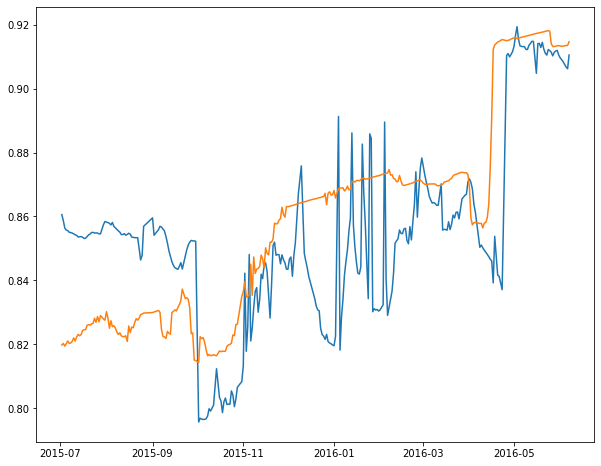

In [773]:
plt.plot(final2['dates'],final2['bhp'])

plt.plot(final8['dates'],final8['bhp'])

In [774]:
r2_score(final2['bhp'], final8['bhp'])

0.289169362764104

In [775]:
print(final1['bhp_regressor_predicted'])

0      0.857097
1      0.857421
2      0.856395
3      0.857023
4      0.857643
         ...   
313    0.902624
314    0.902548
315    0.902523
316    0.902442
317    0.903447
Name: bhp_regressor_predicted, Length: 318, dtype: float64


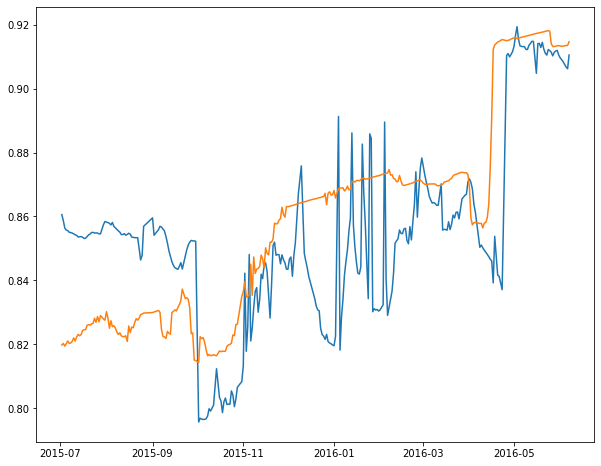

In [776]:
plt.plot(final2['dates'],final2['bhp'])

plt.plot(final8['dates'],final8['bhp'])


In [777]:
r2_score(final2['bhp'], final1['bhp_regressor_predicted'])

0.2389575888952412

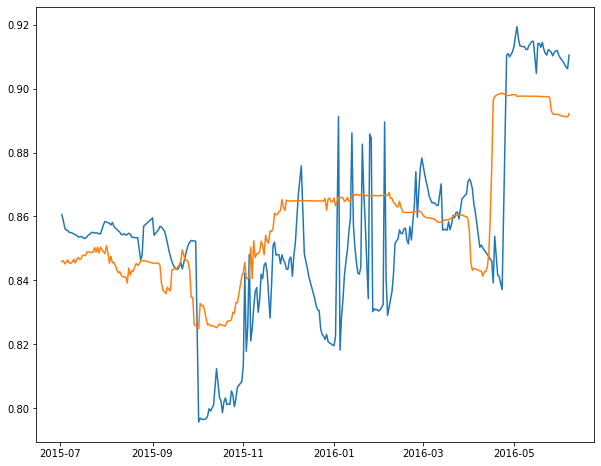

In [778]:
final6 = pd.DataFrame()

# dfbhp2.set_index('ds')['yhat']

final6['dates'] = final1['dates']

final6['bhp'] = (final1['bhp_regressor_predicted'])+dif_mean

plt.plot(final2['dates'],final2['bhp'])

plt.plot(final6['dates'],final6['bhp'])

# plt.ylim(0,1)

In [779]:
r2_score(final2['bhp'], final6['bhp'])

0.5113041884833442

(0.0, 1.0)

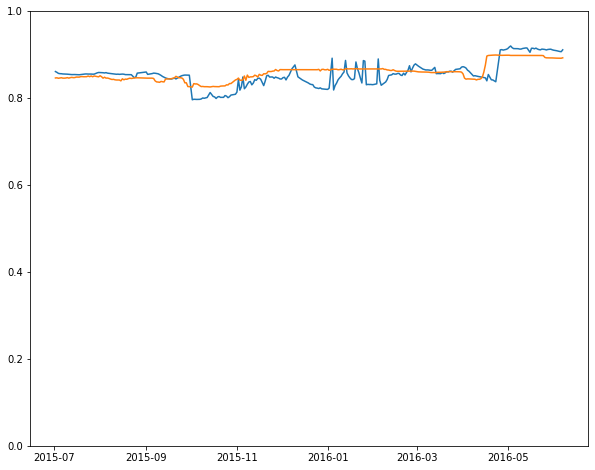

In [780]:
final6 = pd.DataFrame()

# dfbhp2.set_index('ds')['yhat']

final6['dates'] = final1['dates']

final6['bhp'] = (final1['bhp_regressor_predicted'])+dif_mean

plt.plot(final2['dates'],final2['bhp'])

plt.plot(final6['dates'],final6['bhp'])

plt.ylim(0,1)

In [781]:
from sklearn.metrics import accuracy_score

In [782]:
array1 = final2[["bhp"]].to_numpy()

In [783]:
array2 = final6[["bhp"]].to_numpy()

In [784]:
# accuracy_score(array1, array2)


In [785]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = array1
predictions = array2
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.020186


In [786]:
from sklearn.metrics import mean_squared_error
expected = array1
predictions = array2
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 0.000407


In [787]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(array1, array2)  # MSE

RMSE = mean_squared_error(array1, array2, squared=False)           # RMSE

MAE = mean_absolute_error(array1, array2) # MAE


In [788]:
print(MSE)
print(RMSE)
print(MAE)

0.000407487792987033
0.020186326882001913
0.016424645838206568


In [789]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, explained_variance_score, mean_absolute_error, mean_absolute_percentage_error


In [790]:
MAPE= mean_absolute_percentage_error(array1, array2)


# MAE
MAE = mean_absolute_error(array1, array2)
var_score=explained_variance_score(array1, array2)
R2_score = r2_score(array1, array2)

In [791]:
print(MAPE)
print(MAE)
print(var_score)

print(R2_score)

0.019428374271665924
0.016424645838206568
0.5350732751009446
0.5113041884833442


In [792]:
# final4 = final4.reset_index()

In [793]:
final6 = final6.reset_index() 

In [794]:

final7 = pd.DataFrame()
final7['dates'] = final6['dates']

final7['bhp'] = (final6['bhp'] + final4['bhp'])/2



In [795]:
print(final4)

     index       bhp      dates
0     1038  0.832717 2015-07-02
1     1039  0.832902 2015-07-03
2     1040  0.833088 2015-07-04
3     1041  0.833273 2015-07-05
4     1042  0.833457 2015-07-06
..     ...       ...        ...
313   1351  0.880766 2016-06-03
314   1352  0.880896 2016-06-04
315   1353  0.881025 2016-06-05
316   1354  0.881155 2016-06-06
317   1355  0.881284 2016-06-07

[318 rows x 3 columns]


In [796]:
print(final6)

     index      dates       bhp
0        0 2015-07-02  0.845835
1        1 2015-07-03  0.846160
2        2 2015-07-04  0.845133
3        3 2015-07-05  0.845762
4        4 2015-07-06  0.846382
..     ...        ...       ...
313    313 2016-06-03  0.891363
314    314 2016-06-04  0.891287
315    315 2016-06-05  0.891261
316    316 2016-06-06  0.891180
317    317 2016-06-07  0.892185

[318 rows x 3 columns]


In [797]:
print(final7)

         dates       bhp
0   2015-07-02  0.839276
1   2015-07-03  0.839531
2   2015-07-04  0.839110
3   2015-07-05  0.839517
4   2015-07-06  0.839919
..         ...       ...
313 2016-06-03  0.886065
314 2016-06-04  0.886091
315 2016-06-05  0.886143
316 2016-06-06  0.886167
317 2016-06-07  0.886735

[318 rows x 2 columns]


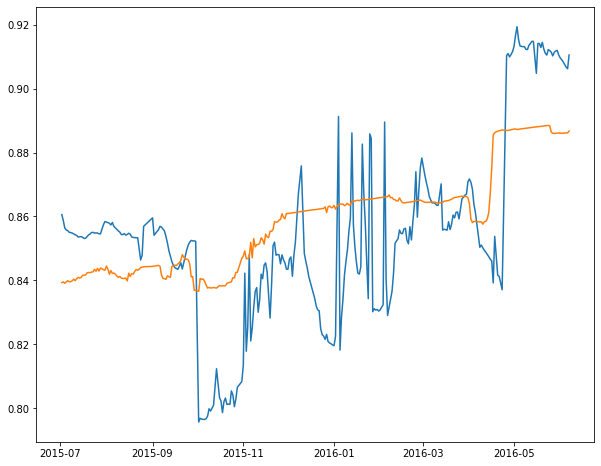

In [798]:
plt.plot(final2['dates'],final2['bhp'])

plt.plot(final7['dates'],final7['bhp'])

In [799]:
r2_score(final2['bhp'], final7['bhp'])

0.41903247407063304

(0.7894935958900736, 0.9255729053274128)

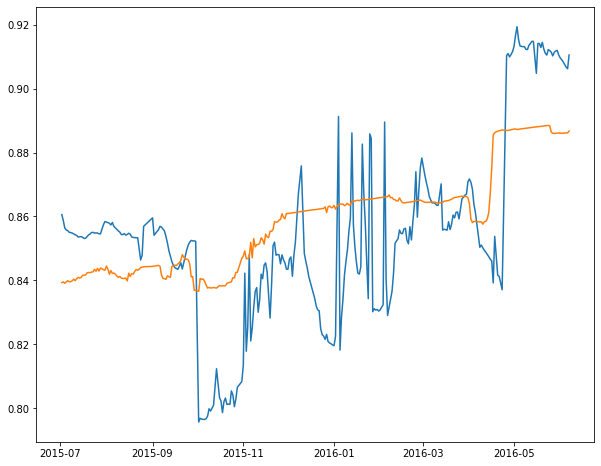

In [800]:
plt.plot(final2['dates'],final2['bhp'])

plt.plot(final7['dates'],final7['bhp'])

plt.ylim()

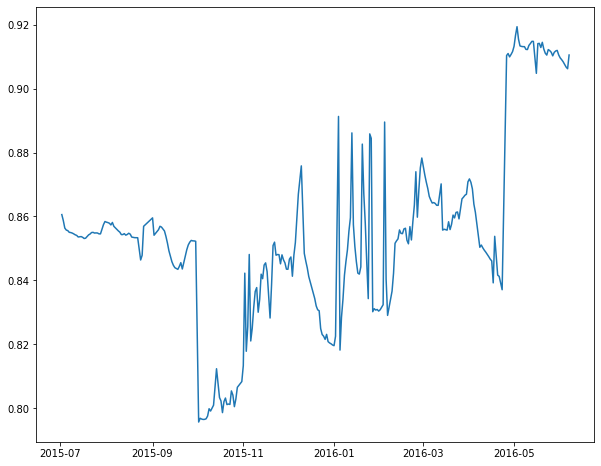

In [801]:
plt.plot(final2['dates'],final2['bhp'])

# plt.plot(final1['dates'],final1['bhp_regressor_predicted'])
# plt.plot(final4['dates'],final4['bhp'])
plt.plot(final5['dates'],final5['bhp'])

In [802]:
print(len(final5))

318


In [803]:
a = stop

NameError: name 'stop' is not defined

In [ ]:
print(final4)

In [ ]:
print(merged)

In [ ]:
plt.plot(merged['dates'],merged['bhp'])

plt.plot(merged['dates'],merged['bhp_regressor_predicted'])

In [ ]:
print(dfnew1)

In [ ]:
print(dfnew3)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, explained_variance_score, mean_absolute_error
r2_score(dfnew1['bhp'], dfnew3['bhp_regressor_predicted'])

In [ ]:
# plt.plot(df2['index'],p(df2['index']),"r--")

In [ ]:
z = np.polyfit(dfnew1['index'],dfnew1['bhp'], 2)

p = np.poly1d(z)



plt.plot(dfnew1['index'],dfnew1['bhp'])
plt.plot(dfnew2['index'],dfnew2['yhat'])
plt.plot(dfnew1['index'],p(dfnew1['index']),"r--")

In [ ]:
print(dfnew1['index'])

In [ ]:
print(dfnew2['yhat'])

In [ ]:

plt.plot(dfnew2['index'],p(dfnew2['index']))
